In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_json("../data/external/palestras.json")

In [4]:
df.head()

,ano,cidade,description,title,trilha,trilha_url
0,2014,banners-digitais,Não encontrada,Não encontrada,banners-digitais,http://www.thedevelopersconference.com.br/tdc/...
1,2014,florianopolis,Não encontrada,Não encontrada,trilha-testes,http://www.thedevelopersconference.com.br/tdc/...
2,2014,florianopolis,Não encontrada,Não encontrada,trilha-management3,http://www.thedevelopersconference.com.br/tdc/...
3,2014,saopaulo,Não encontrada,Não encontrada,trilha-nosql,http://www.thedevelopersconference.com.br/tdc/...
4,2014,saopaulo,Não encontrada,Não encontrada,trilha-bigdata,http://www.thedevelopersconference.com.br/tdc/...


In [5]:
df.shape

(14559, 6)

In [6]:
df.description = df.description.apply(lambda value: str(value))
df.drop_duplicates(subset="description").shape

(3230, 6)

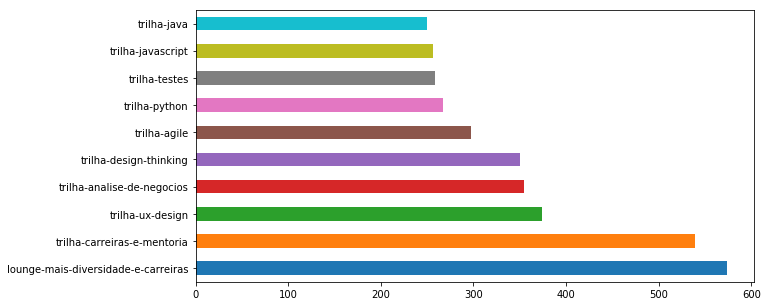

In [7]:
df.trilha.value_counts().head(10).plot(kind='barh', figsize=(10,5))

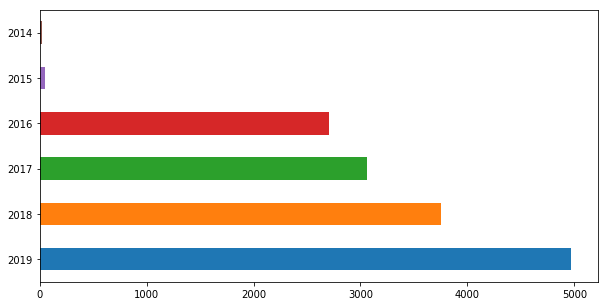

In [8]:
df.ano.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(10,5))

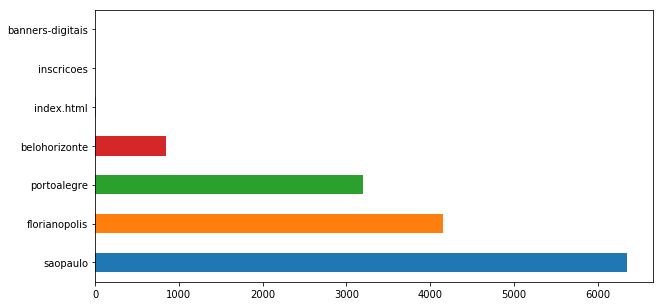

In [9]:
df.cidade.value_counts().plot(kind='barh', figsize=(10,5))

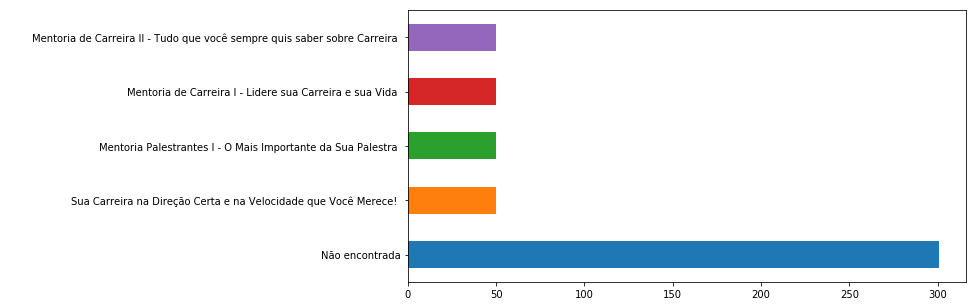

In [10]:
df.title.value_counts().head(5).plot(kind='barh', figsize=(10,5))

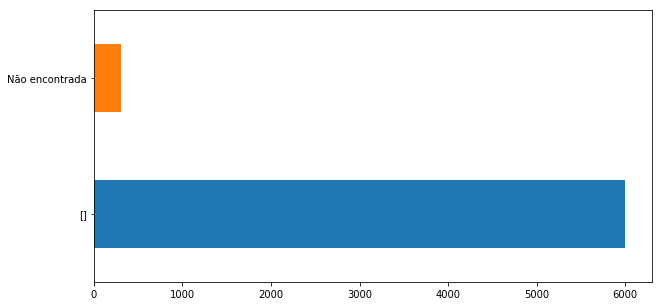

In [11]:
df.description.value_counts().head(2).plot(kind='barh', figsize=(10,5))

### Missing values

In [12]:
df.description.replace('Não encontrada',np.NaN, inplace=True)
df.description = df.description.apply(lambda value: np.NaN if (len(str(value)) < 5) else value)
df.description = df.description.apply(lambda value: str(value))

df.title.replace('Não encontrada',np.NaN, inplace=True)

#### Missing values por ano:

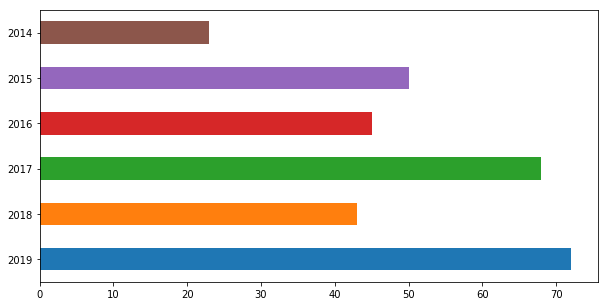

In [13]:
df[df.isna().any(axis=1)].ano.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(10,5))

### O corpus

In [14]:
df.dropna(inplace=True)
df.drop_duplicates(subset="description", inplace=True)
print("Corpus com",df.shape[0], "palestras.")

Corpus com 3229 palestras.


Quantidade de palestras por ano:


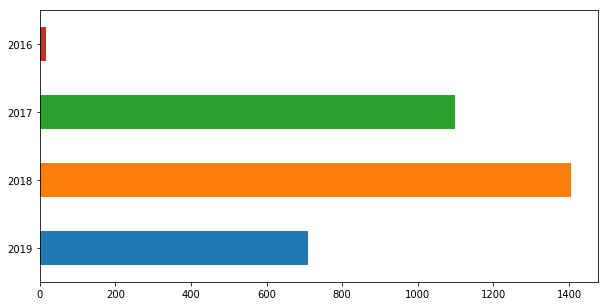

In [15]:
print("Quantidade de palestras por ano:")
df.ano.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(10,5))

Quantidade de palestras por cidade:


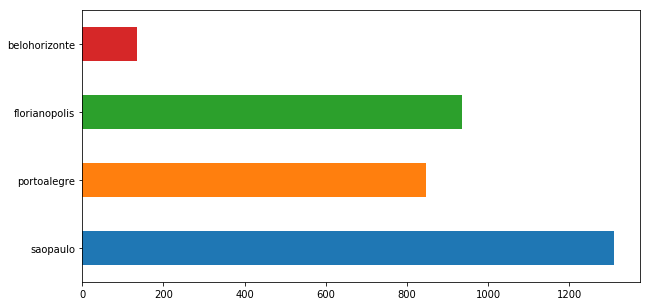

In [17]:
print("Quantidade de palestras por cidade:")
df.cidade.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(10,5))